<a href="https://colab.research.google.com/github/arraiyopensource/kornia-examples/blob/master/filter_edges.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Compute filter edges

In this tutorial we are going to learn how to compute the first order and second order derivatives of an image using `kornia.filters`.

In [22]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


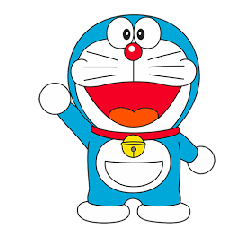

In [23]:
from matplotlib import pyplot as plt
import cv2
import numpy as np

# load using opencv and convert to RGB
img_bgr: np.array = cv2.imread('doraemon.png', cv2.IMREAD_COLOR)
img_rgb: np.array = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb); plt.axis('off');

In [24]:
!pip install kornia;
import torch
import kornia
import torchvision

In [0]:
def imshow(input: torch.Tensor):
    out: torch.Tensor = torchvision.utils.make_grid(input, nrow=2)
    out_np: np.array = kornia.tensor_to_image(out)
    plt.imshow(out_np); plt.axis('off');

In [0]:
# stack images
data: torch.Tensor = kornia.image_to_tensor(img_rgb)  # 1xCxHxW
data = data.expand(2, -1, -1, -1)  # 4xCxHxW

# cast to float and normalize
data = data.float() / 255.

# to gray
x_gray = kornia.rgb_to_grayscale(data)

## Compute the 1st order derivates



In [0]:
grads: torch.Tensor = kornia.spatial_gradient(x_gray, order=1) # BxCx2xHxW
grads_x = grads[:, :, 0]
grads_y = grads[:, :, 1]

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


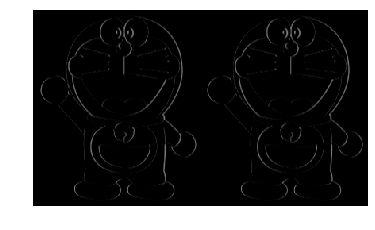

In [28]:
imshow(grads_x)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


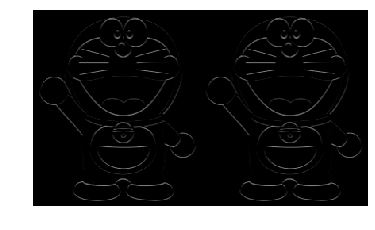

In [29]:
imshow(grads_y)

## Sobel Edges

Once with the gradients in the two directions we can computet the Sobel edges. However, in kornia we already have it implemented.

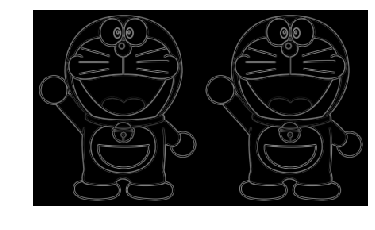

In [30]:
x_sobel: torch.Tensor = kornia.sobel(x_gray)
imshow(x_sobel)

## Compute the 2nd order derivates


In [0]:
grads: torch.Tensor = kornia.spatial_gradient(x_gray, order=2) # BxCx2xHxW
grads_x = grads[:, :, 0]
grads_y = grads[:, :, 1]

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


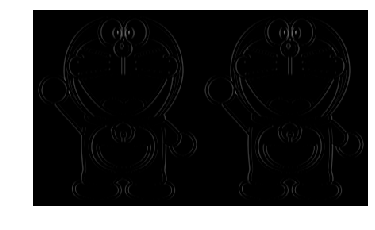

In [32]:
imshow(grads_x)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


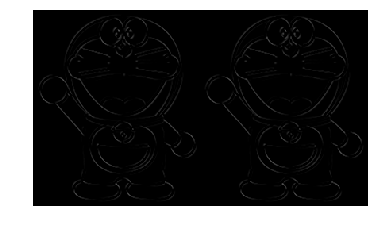

In [33]:
imshow(grads_y)

## Laplacian Edges

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


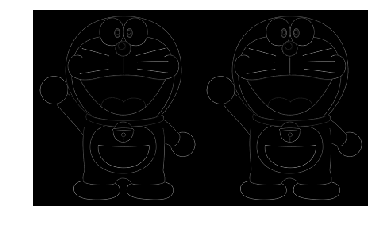

In [34]:
x_laplacian: torch.Tensor = kornia.laplacian(x_gray, kernel_size=5)
imshow(x_laplacian)